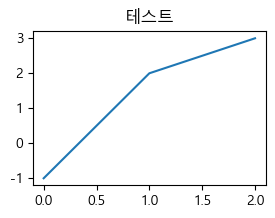

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 데이터 수집

-  계절별 산불현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13625_A002%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26


## 계절별 산불 발생 현황

In [3]:
# -----------------------------
# 계절별 컬러
# -----------------------------

season_color_set = {
    '봄(3~5월)': '#F28CB1',   
    '여름(6~8월)': '#4EA8DE',  
    '가을(9~11월)': '#D2691E', 
    '겨울(12~2월)': '#6C757D'  
}

In [4]:
# -----------------------------
# 데이터프레임 생성
# -----------------------------

df_season = pd.read_csv("C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\산불데이터\\계절별_산불발생_현황_20250416092040.csv")

In [5]:
# -----------------------------
# 인덱스라벨 지정
#   - 시점
# -----------------------------

df_season.set_index('시점', inplace=True)

In [6]:
# -----------------------------
# info()
# -----------------------------

df_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1997 to 2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간별        28 non-null     object
 1   합계         28 non-null     int64 
 2   봄(3~5월)    28 non-null     int64 
 3   여름(6~8월)   28 non-null     int64 
 4   가을(9~11월)  28 non-null     int64 
 5   겨울(12~2월)  28 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [7]:
# -----------------------------
# 계절별 평균 산불 발생 건수 
# -----------------------------

df_season.drop(columns=['기간별', '합계'], inplace=True)
df_season.mean()

봄(3~5월)      285.785714
여름(6~8월)      28.107143
가을(9~11월)     41.142857
겨울(12~2월)    121.000000
dtype: float64

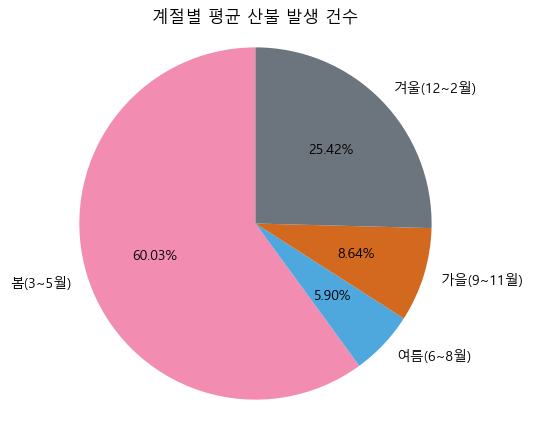

In [8]:
# -----------------------------
# 계절별 평균 산불 발생 건수 시각화
# -----------------------------

# 평균 계산
mean_by_season = df_season.mean()

# 파이차트 시각화
plt.figure(figsize=(5, 5))
plt.pie(
    mean_by_season,
    labels=mean_by_season.index,
    autopct='%.2f%%',
    startangle=90,
    colors=[season_color_set[s] for s in mean_by_season.index]
)
plt.title('계절별 평균 산불 발생 건수')
plt.axis('equal')
plt.show()

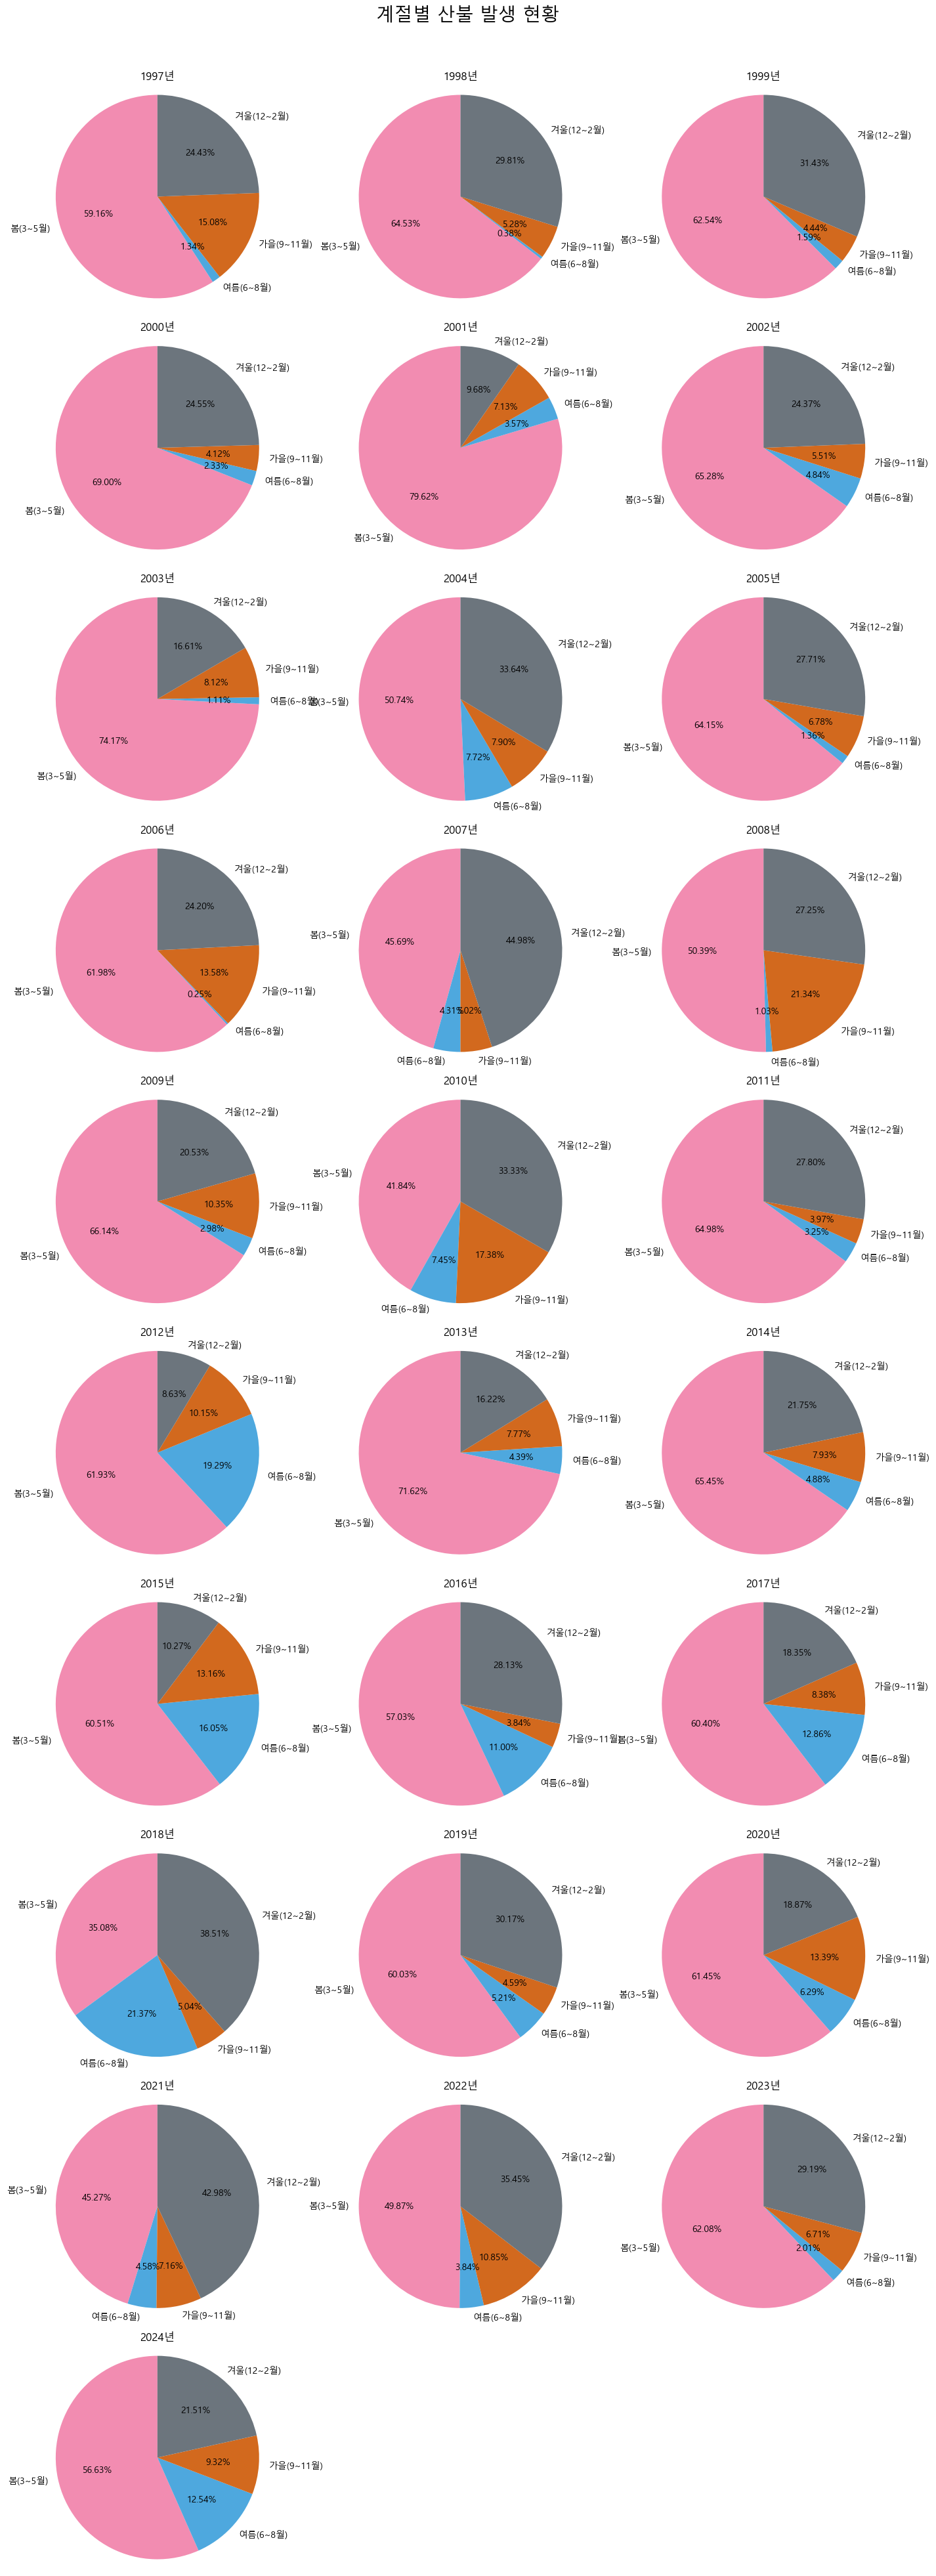

In [9]:
# -----------------------------
# 연도별 시각화
# -----------------------------

# 연도 리스트 및 subplot 구성
years = df_season.index
ncols = 3
nrows = (len(years) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
axes = axes.flatten()

# 연도별 파이차트 반복 생성
for i, year in enumerate(years):
    values = df_season.loc[year]
    ax = axes[i]
    ax.pie(
        values,
        labels=values.index,
        autopct='%.2f%%',
        startangle=90,
        colors=[season_color_set[s] for s in values.index]
    )
    ax.set_title(f'{year}년')
    ax.axis('equal')

# 남는 서브플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('계절별 산불 발생 현황', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## **계절별 산불 발생 분석**

### 전체 평균

- **봄(3~5월)**: **60.03%**
- **겨울(12~2월)**: 25.42%
- **가을(9~11월)**: 8.64%
- **여름(6~8월)**: 5.90%

> **봄철에 산불이 가장 많이 발생**하며, 전체 발생 건수의 절반 이상 차지

### 연도별 경향

- 대부분의 연도에서 **봄(3~5월)**이 **50~70% 수준**으로 가장 높은 비율을 유지하고 있음.
- **여름(6~8월)**은 연도와 무관하게 항상 낮은 비율 (0.2% ~ 20%)을 보임.
- **2012년**과 **2015년**은 여름 산불 비중이 예외적으로 높았음.